# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix

# Taking Data

In [2]:
df1= pd.read_csv('train.csv')
df2=pd.read_csv('test.csv')

# Preprocessing and Data Visualization

In [3]:
df1.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df1.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [5]:
train_desater = df1[df1['target'] == 1]

In [6]:
train_desater

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [7]:
train_not_desater = df1[df1['target'] == 0]

In [8]:
train_not_desater

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0
18,26,NaN,NaN,My car is so fast,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0
...,...,...,...,...,...
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0
7582,10834,wrecked,NaN,Cramer: Iger's 3 words that wrecked Disney's s...,0
7584,10837,NaN,NaN,These boxes are ready to explode! Exploding Ki...,0
7587,10841,NaN,NaN,Sirens everywhere!,0


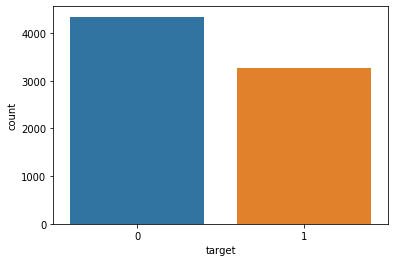

In [9]:
sns.countplot(df1['target'])

In [10]:
vectorizer = CountVectorizer()

In [11]:
train_disaster_countvectorizer = vectorizer.fit_transform(df1['text'])

In [12]:
train_disaster_countvectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
label = df1['target']
label

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64

In [14]:
df2.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [15]:
df2.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [16]:
test_disaster_countvectorizer = vectorizer.transform(df2['text'])

In [17]:
test_disaster_countvectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Training with train data and evaluation with given test data

## Support Vector Machine

In [18]:
from sklearn.svm import SVC

In [19]:
model_svc=SVC(C=100,kernel='rbf')

In [20]:
model_svc.fit(train_disaster_countvectorizer, label)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
test_sample = test_disaster_countvectorizer.toarray()
test_sample

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
test_sample.shape

(3263, 21637)

In [23]:
prediction = model_svc.predict(test_sample)

In [24]:
prediction_df = pd.DataFrame(prediction, columns=['target'])

In [25]:
prediction_df

,target
0,1
1,1
2,1
3,0
4,1
...,...
3258,1
3259,1
3260,1
3261,1


In [26]:
predicted_result = pd.concat([df2['id'], prediction_df], axis=1)
predicted_result

,id,target
0,0,1
1,2,1
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [27]:
predicted_result.isnull().sum()

id        0
target    0
dtype: int64

In [28]:
predicted_result['target'].value_counts()

0    2132
1    1131
Name: target, dtype: int64

In [29]:
predicted_result.to_csv('predicted_result.csv', index=False)

# Training and valuation with splitted train test data

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_disaster_countvectorizer, label, test_size=0.2)

## Support Vector Machine Classifier

In [31]:
model_svc.fit(x_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
predictions_svc = model_svc.predict(x_test)

In [33]:
print(classification_report(y_test, predictions_svc))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       894
           1       0.79      0.68      0.73       629

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



## KNeighborsClassifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier
model_knc = KNeighborsClassifier()
model_knc.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [35]:
predictions_knc = model_knc.predict(x_test)

In [36]:
print(classification_report(y_test, predictions_knc))

              precision    recall  f1-score   support

           0       0.68      0.93      0.79       894
           1       0.79      0.38      0.51       629

    accuracy                           0.70      1523
   macro avg       0.73      0.65      0.65      1523
weighted avg       0.72      0.70      0.67      1523



## Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()
model_rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
predictions_rfc = model_rfc.predict(x_test)

In [39]:
print(classification_report(y_test, predictions_rfc))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       894
           1       0.86      0.58      0.69       629

    accuracy                           0.79      1523
   macro avg       0.81      0.76      0.77      1523
weighted avg       0.80      0.79      0.78      1523



In [40]:
#narendra738841

## Multinomial Naive Bayes

In [41]:
from sklearn.naive_bayes import MultinomialNB

model_mnb = MultinomialNB()
model_mnb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [42]:
predictions_mnb = model_mnb.predict(x_test)

In [43]:
print(classification_report(y_test, predictions_mnb))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       894
           1       0.77      0.70      0.73       629

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523

